In [1]:
import datetime, time
from scipy.interpolate import griddata
import netCDF4
import numpy as np
from IPython.display import clear_output

import cartopy.crs as ccrs
import cartopy
import cartopy.feature as cfeature

import matplotlib.pyplot as plt
% matplotlib notebook

In [2]:
class flow_zuno(): 
    def __init__(self): 
        
        a = 0
        b = -1
        c = 0
        d = -1
        e = 1

        nc = netCDF4.Dataset('E:/Use_case_Noorwegen/6_days/20190501000000.nc')
        x = nc.variables["x"][a:b, c:d][::e, ::e]
        y = nc.variables["y"][a:b, c:d][::e, ::e]  
        d_f = nc.variables["SEP"][:, a:b, c:d][:, ::e, ::e]
        t = nc.variables["time"][:]

        nc = netCDF4.Dataset('E:/Use_case_Noorwegen/6_days/20190503000000.nc')
        d2 = nc.variables["SEP"][:, a:b, c:d][:, ::e, ::e]
        t2 = nc.variables["time"][:]

        d_f = np.concatenate((d_f,d2))
        t = np.concatenate((t,t2))
        
        nc = netCDF4.Dataset('E:/Use_case_Noorwegen/6_days/20190505000000.nc')
        d2 = nc.variables["SEP"][:, a:b, c:d][:, ::e, ::e]
        t2 = nc.variables["time"][:]


        d = np.concatenate((d_f,d2))
        t = np.concatenate((t,t2))
        
        self.x = x
        self.y = y
        self.d = d
        self.t = t
        

In [3]:
f = flow_zuno()

<IPython.core.display.Javascript object>


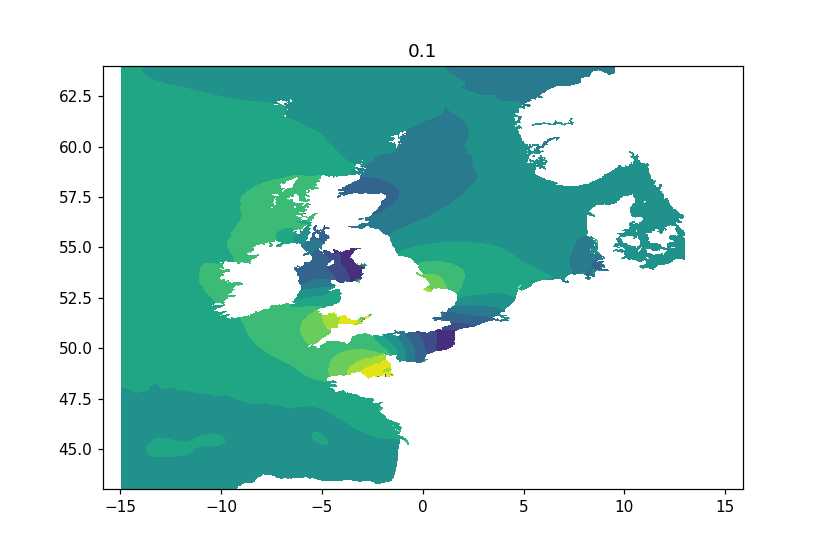

MovieWriter ffmpeg unavailable. Trying to use pillow instead.


In [13]:
import matplotlib.animation as animation
% matplotlib notebook

fig = plt.figure(figsize=(7.5,5))
ax = plt.subplot()
ax.axis('equal')

plt.xlim(-15,15)
plt.ylim(43,64)

c = np.linspace(-5,5,12)

q = plt.contourf(
    f.x,
    f.y,
    f.d[0],
    c
            )


def update_line(i, q):
    i = i*1
    Q = int((i)/(len(f.t[:])))
    i = i - Q * (len(f.t[:]))
    plt.title(np.round((f.t[i] - f.t[0])/ 3600 ,1) )
        
    plt.contourf(
        f.x,
        f.y,
        f.d[i],
        c
    )
    
    return q

    
ani = animation.FuncAnimation(fig, 
                              update_line,
                              len(f.t),
                              fargs=[q], 
                              interval=250,
                              repeat = True
                             )

# ani.save('gif{}.gif'.format(int(time.time())))

Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py", line 215, in process
    func(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\animation.py", line 1478, in _stop
    self.event_source.remove_callback(self._loop_delay)
AttributeError: 'NoneType' object has no attribute 'remove_callback'


<IPython.core.display.Javascript object>


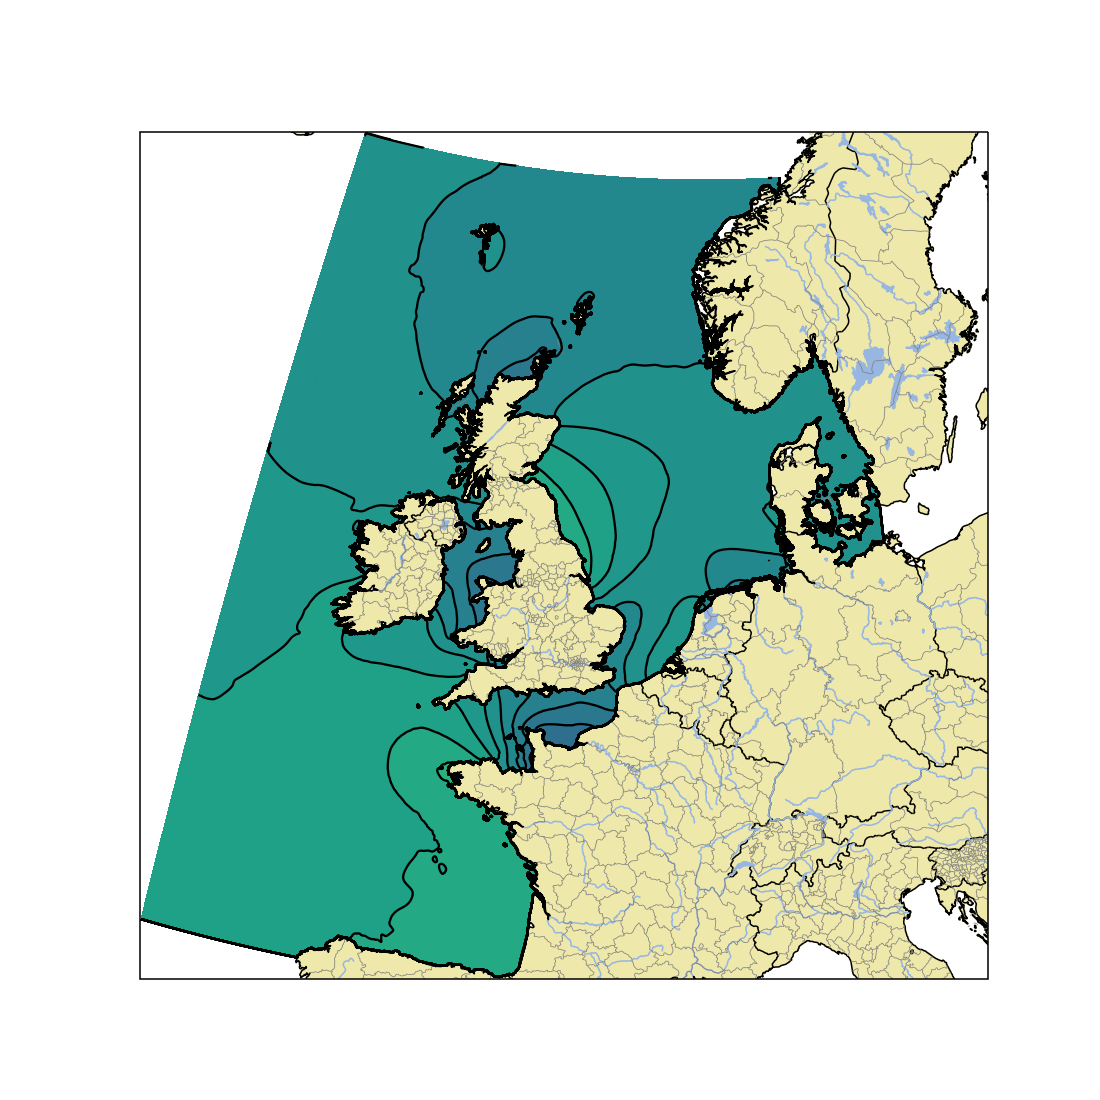

In [8]:
import matplotlib.animation as animation
% matplotlib notebook

fig = plt.figure(figsize=(10,10))
ax = plt.subplot(projection=ccrs.Orthographic(central_longitude=5, central_latitude=53))

states_provinces = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_1_states_provinces_lines',
    scale='10m',
    facecolor='none')

ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '10m', edgecolor='face', facecolor='palegoldenrod'))
ax.add_feature(cfeature.BORDERS.with_scale('10m'))
ax.add_feature(cfeature.LAKES.with_scale('10m'), )
ax.add_feature(cfeature.RIVERS.with_scale('10m'), )
ax.coastlines(resolution='10m', color='k')
ax.add_feature(states_provinces, edgecolor='gray', linewidth = 0.5)

ax.set_extent([-15,15, 43,64])

c = np.linspace(-10,10,30)
plt.contourf(
    f.x,
    f.y,
    f.d[3],
    c,
    transform=ccrs.PlateCarree()
            )

plt.contour(
    f.x,
    f.y,
    f.d[3],
    c,
    colors = 'black',
    linestyles='-',
    transform=ccrs.PlateCarree()
            )

plt.savefig('Cotidal-lines')